<h2>Fashion MNIST dataset in Keras library</h2>

<h2>Load data</h2>

In [2]:
# Imports
# - Dataset
from keras.datasets import fashion_mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Convolution2D, MaxPooling2D
from keras.callbacks import EarlyStopping

# Ignore warnings
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# Load pre-shuffled Fashion MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = fashion_mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = np_utils.to_categorical(y_train_raw, 10)
y_test = np_utils.to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [3]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


<h2>Build Linear model</h2>

In [4]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(lin_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


<h2>Train and evaluate Linear model on test data</h2>

In [5]:
# Start timer
start = time.time()

# Train model on training data
lin_clf.fit(X_train_1D, y_train, batch_size=32, epochs=8, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

Epoch 1/8
60000/60000 [==============================] - 2s 36us/step - loss: 0.6006 - acc: 0.7958
Epoch 2/8
60000/60000 [==============================] - 2s 33us/step - loss: 0.4611 - acc: 0.8427
Epoch 3/8
60000/60000 [==============================] - 2s 33us/step - loss: 0.4361 - acc: 0.8499
Epoch 4/8
60000/60000 [==============================] - 2s 36us/step - loss: 0.4217 - acc: 0.8542
Epoch 5/8
60000/60000 [==============================] - 2s 33us/step - loss: 0.4137 - acc: 0.8575
Epoch 6/8
60000/60000 [==============================] - 2s 33us/step - loss: 0.4064 - acc: 0.8608
Epoch 7/8
60000/60000 [==============================] - 2s 33us/step - loss: 0.4023 - acc: 0.8603
Epoch 8/8
60000/60000 [==============================] - 2s 35us/step - loss: 0.3981 - acc: 0.8616

Test Accuracy: 84.61%
Time elapsed: 16.64 sec


<h2>Build Neural Net model</h2>

In [6]:
# Create Neural Net Softmax model
nn_clf = Sequential()
# - first Dense
nn_clf.add(Dense(128, input_dim=784, activation="elu", kernel_initializer="he_normal"))
nn_clf.add(Dropout(0.2))
# - second Dense
nn_clf.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
nn_clf.add(Dropout(0.2))
# - output
nn_clf.add(Dense(10, activation="softmax"))

# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(nn_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


<h2>Train and evaluate Neural Net model on test data</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 4s 74us/step - loss: 0.5881 - acc: 0.7908 - val_loss: 0.4304 - val_acc: 0.8468
Epoch 2/15
48000/48000 [==============================] - 3s 67us/step - loss: 0.4459 - acc: 0.8400 - val_loss: 0.3852 - val_acc: 0.8588
Epoch 3/15
48000/48000 [==============================] - 3s 65us/step - loss: 0.4057 - acc: 0.8521 - val_loss: 0.3602 - val_acc: 0.8689
Epoch 4/15
48000/48000 [==============================] - 3s 67us/step - loss: 0.3809 - acc: 0.8595 - val_loss: 0.3726 - val_acc: 0.8697
Epoch 5/15
48000/48000 [==============================] - 3s 66us/step - loss: 0.3606 - acc: 0.8666 - val_loss: 0.3527 - val_acc: 0.8696
Epoch 6/15
48000/48000 [==============================] - 3s 63us/step - loss: 0.3505 - acc: 0.8700 - val_loss: 0.3547 - val_acc: 0.8711
Epoch 7/15
48000/48000 [==============================] - 3s 66us/step - loss: 0.3424 - acc: 0.8734 - val_loss: 0.3273 - val_acc

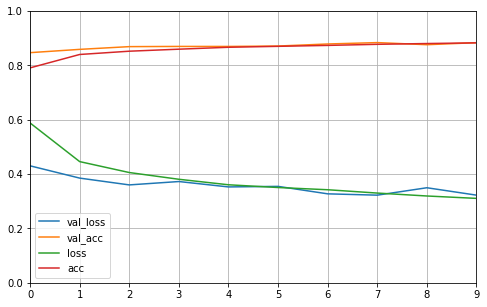

In [7]:
# Early stopping
cp = EarlyStopping(patience=2, restore_best_weights=True)

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<h2>Build ConvNet model</h2>

In [8]:
# Create ConvNet model
cnn_clf = Sequential()
# - first conv/pool 
cnn_clf.add(Convolution2D(32, (3,3), input_shape=(28,28,1), activation="elu", padding="same", kernel_initializer="he_normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
cnn_clf.add(Dropout(0.3))
# - second conv/pool
cnn_clf.add(Convolution2D(64, (3,3), activation="elu", padding="same", kernel_initializer="he_normal"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
cnn_clf.add(Dropout(0.3))
# - fully connected
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, activation="elu"))
cnn_clf.add(BatchNormalization())
cnn_clf.add(Dropout(0.3))
# - output
cnn_clf.add(Dense(10, activation="softmax"))

# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(cnn_clf.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

<h2>Train and evaluate ConvNet model on test data</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 57s 1ms/step - loss: 0.5025 - acc: 0.8182 - val_loss: 0.4241 - val_acc: 0.8456
Epoch 2/15
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3492 - acc: 0.8738 - val_loss: 0.3643 - val_acc: 0.8652
Epoch 3/15
48000/48000 [==============================] - 57s 1ms/step - loss: 0.3089 - acc: 0.8871 - val_loss: 0.3027 - val_acc: 0.8891
Epoch 4/15
48000/48000 [==============================] - 57s 1ms/step - loss: 0.2841 - acc: 0.8957 - val_loss: 0.2659 - val_acc: 0.9015
Epoch 5/15
48000/48000 [==============================] - 57s 1ms/step - loss: 0.2652 - acc: 0.9023 - val_loss: 0.2721 - val_acc: 0.9033
Epoch 6/15
48000/48000 [==============================] - 58s 1ms/step - loss: 0.2509 - acc: 0.9068 - val_loss: 0.2496 - val_acc: 0.9078
Epoch 7/15
48000/48000 [==============================] - 58s 1ms/step - loss: 0.2404 - acc: 0.9117 - val_loss: 0.2487 - val_acc

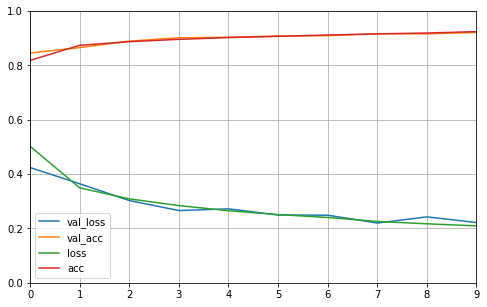

In [9]:
# Start timer
start = time.time()

# Store best model
cp = EarlyStopping(patience=2, monitor="val_loss", restore_best_weights=True)

# Train model on training data
# Note: uses 20% of the training set for validation
history = cnn_clf.fit(X_train_2D, y_train, batch_size=64, epochs=15, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

<h2>Confusion matrix</h2>

In [10]:
# Make predictions
y_pred = cnn_clf.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1), 
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[853   0  16  10   5   1 109   1   5   0]
 [  1 977   0  16   1   0   3   0   2   0]
 [ 15   1 855   5  57   0  67   0   0   0]
 [  9   0  10 922  16   0  42   0   1   0]
 [  0   0  39  23 869   0  69   0   0   0]
 [  0   0   0   0   0 978   0  16   0   6]
 [ 79   0  54  24  53   0 783   0   7   0]
 [  0   0   0   0   0   4   0 975   0  21]
 [  3   1   2   3   1   2   4   3 981   0]
 [  0   0   0   0   0   4   1  36   0 959]]


<h2>Dimensionality Reduction</h2>

In [11]:
from sklearn.decomposition import PCA

# Create PCA
pca = PCA(n_components=0.95)
pca.fit(X_train_1D)
# Reduce dimensionality on training and test sets
X_train_1D_dr = pca.transform(X_train_1D)
X_test_1D_dr = pca.transform(X_test_1D)
# Show dataset shape
print("Training set:",X_train_1D_dr.shape)
print("Test set:",X_test_1D_dr.shape)

Training set: (60000, 187)
Test set: (10000, 187)


<h2>Train and evaluate reduced dataset with a neural network</h2>

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 43us/step - loss: 0.5750 - acc: 0.7971 - val_loss: 0.4078 - val_acc: 0.8559
Epoch 2/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.4276 - acc: 0.8490 - val_loss: 0.3803 - val_acc: 0.8643
Epoch 3/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.3912 - acc: 0.8583 - val_loss: 0.3531 - val_acc: 0.8722
Epoch 4/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.3681 - acc: 0.8643 - val_loss: 0.3537 - val_acc: 0.8712
Epoch 5/20
48000/48000 [==============================] - 2s 40us/step - loss: 0.3504 - acc: 0.8725 - val_loss: 0.3398 - val_acc: 0.8746
Epoch 6/20
48000/48000 [==============================] - 2s 36us/step - loss: 0.3369 - acc: 0.8769 - val_loss: 0.3290 - val_acc: 0.8808
Epoch 7/20
48000/48000 [==============================] - 2s 37us/step - loss: 0.3260 - acc: 0.8803 - val_loss: 0.3206 - val_acc

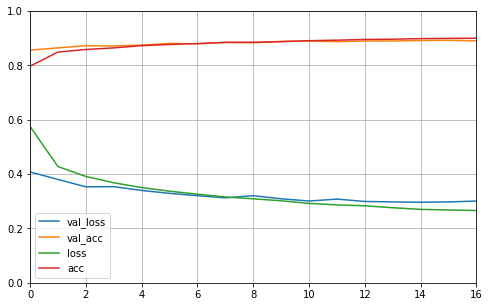

In [12]:
# Create Neural Net Softmax model for the reduced size dataset
snn_clf = Sequential()
# - first Dense
snn_clf.add(Dense(128, input_dim=187, activation="elu", kernel_initializer="he_normal"))
snn_clf.add(Dropout(0.2))
# - second Dense
snn_clf.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
snn_clf.add(Dropout(0.2))
# - output
snn_clf.add(Dense(10, activation="softmax"))

# Early stopping
cp = EarlyStopping(patience=2, restore_best_weights=True)

# Compile model
snn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = snn_clf.fit(X_train_1D_dr, y_train, batch_size=64, epochs=20, validation_split=0.2, callbacks=[cp], verbose=1)
# Evaluate model on test data
score = snn_clf.evaluate(X_test_1D_dr, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()

<h2>Predict examples</h2>

Predicted: Ankle boot
Actual: Ankle boot


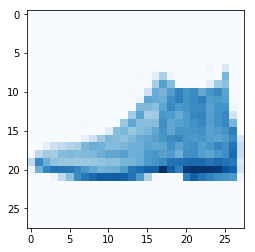

Predicted: Pullover
Actual: Pullover


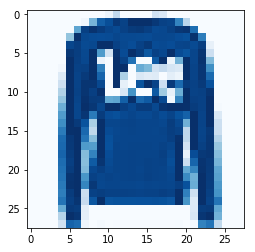

Predicted: Trouser
Actual: Trouser


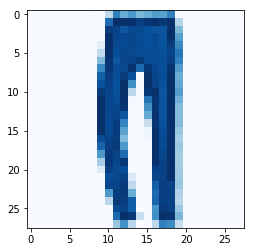

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Examples to classify
examples = X_test_2D[:3]

res = np.argmax(cnn_clf.predict(examples), axis=1)

for i in range(0,len(res)):
    print("Predicted:",class_names[res[i]])
    print("Actual:",class_names[y_test_raw[i]])
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    plt.show()